In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qbstyles import mpl_style

import torch
from torch import nn

plt.style.use("dark_background")

(8, 8)

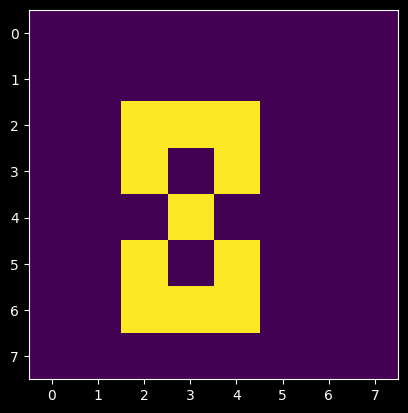

In [2]:
np.random.seed(42)

mat = np.array([
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
])

image = torch.tensor(np.array([[mat]]), dtype=torch.float)


plt.imshow(mat)
mat.shape

In [3]:
conv = nn.Conv2d(1, 1, kernel_size=(2, 2))
conv.state_dict()['weight'][:] = torch.tensor([
    [1, 1],
    [1, 0],
])
conv.state_dict()['bias'][:] = torch.tensor([0])

conv.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 0.]]]])),
             ('bias', tensor([0.]))])

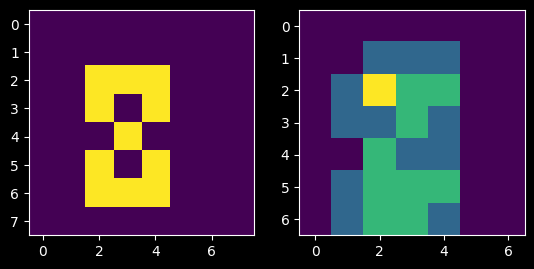

In [4]:
feature_map = conv(image)
feature_image = feature_map.detach().numpy().squeeze()

_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)


ax1.imshow(mat)
ax2.imshow(feature_image)

In [6]:
max_pooling = nn.MaxPool2d(2)

pool_map = max_pooling(feature_map)
pool_image = pool_map.detach().numpy()

In [21]:
nn.MaxPool2d((2, 5)).stride

(2, 5)

In [9]:
pool_image.shape

(1, 1, 3, 3)

## Multi input/output channels Convo

In [40]:
sample_image = torch.randint(1, 6, size=(1, 3, 4, 4), dtype=torch.float)
print(sample_image)
multi_in_conv = nn.Conv2d(3, 10, kernel_size=3)

print()
print(multi_in_conv.state_dict()['weight'].shape)

tensor([[[[4., 2., 1., 3.],
          [2., 1., 5., 2.],
          [4., 5., 5., 3.],
          [4., 5., 5., 3.]],

         [[3., 3., 4., 2.],
          [1., 1., 1., 3.],
          [4., 3., 4., 4.],
          [3., 3., 3., 3.]],

         [[2., 2., 1., 1.],
          [1., 5., 1., 2.],
          [1., 4., 2., 3.],
          [1., 4., 2., 1.]]]])

torch.Size([10, 3, 3, 3])


In [38]:
multi_in_conv(sample_image)

tensor([[[[ 0.9364,  0.3838],
          [ 0.9594, -0.5805]],

         [[ 0.6599,  0.0932],
          [ 0.8361,  0.8609]],

         [[-0.8931, -0.4311],
          [-0.0700, -0.3732]],

         [[-1.6745,  1.6016],
          [ 0.7414,  1.3255]],

         [[-0.3846,  0.1411],
          [ 1.4873,  1.3069]],

         [[ 1.3295,  3.0269],
          [ 0.6615,  0.8917]],

         [[ 3.0543,  3.4952],
          [ 1.2732,  1.4279]],

         [[-0.6736, -0.9205],
          [-0.6878, -0.0402]],

         [[-0.1497, -0.0748],
          [ 0.6108, -0.3936]],

         [[ 2.9716,  1.9623],
          [ 1.5769,  4.0967]]]], grad_fn=<ConvolutionBackward0>)

## Kernel for `X`

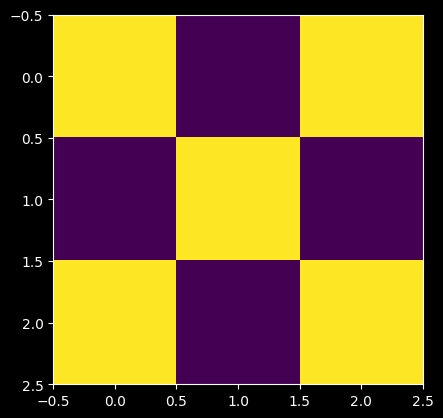

In [83]:
image_x = torch.tensor([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1],
], dtype=torch.float)

plt.imshow(image_x)

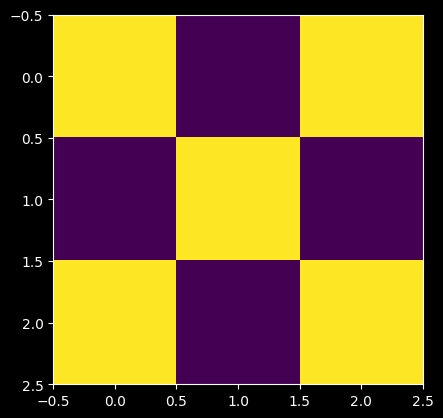

In [85]:
kernel_x = torch.tensor([
    [1, -1, 1],
    [-1, 1, -1],
    [1, -1, 1],
])

conv = nn.Conv2d(1, 1, (3, 3))
max_pooling = nn.MaxPool2d((2, 2))

conv.state_dict()['weight'][0, 0] = kernel_x
conv.state_dict()['bias'][0] = 0.0

plt.imshow(conv.state_dict()['weight'][0, 0])

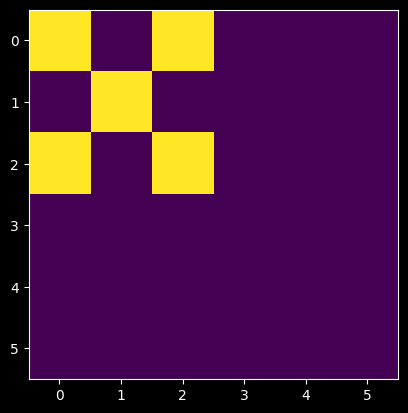

In [87]:
blank = torch.zeros((3, 3), dtype=torch.float)

sub_row1 = torch.concat([image_x, blank], axis=1)
sub_row2 = torch.concat([blank, blank], axis=1)
image = torch.concat([sub_row1, sub_row2])

plt.imshow(image)

tensor([[5., 0., 2., 0.],
        [0., 2., 0., 0.],
        [2., 0., 1., 0.],
        [0., 0., 0., 0.]])

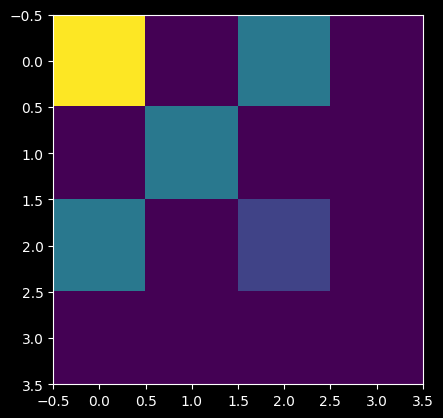

In [92]:
image_tensor = torch.unsqueeze(image, 0)
feature_map = conv(image_tensor)[0].detach()

plt.imshow(feature_map.relu())
feature_map.relu()

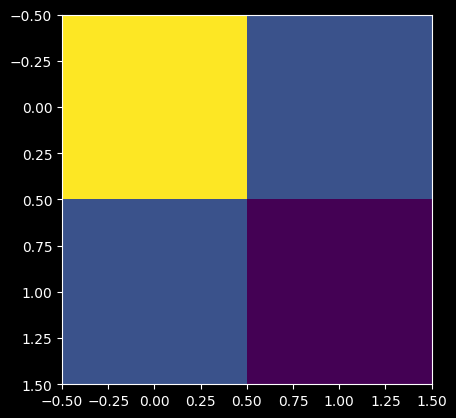

In [100]:
plt.imshow(max_pooling(feature_map.unsqueeze(0))[0])

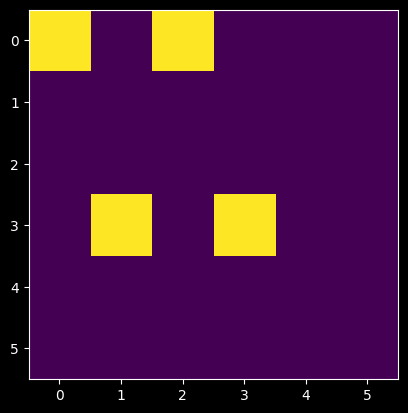

In [94]:
test_image = torch.tensor([
    [1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
], dtype=torch.float)

plt.imshow(test_image)

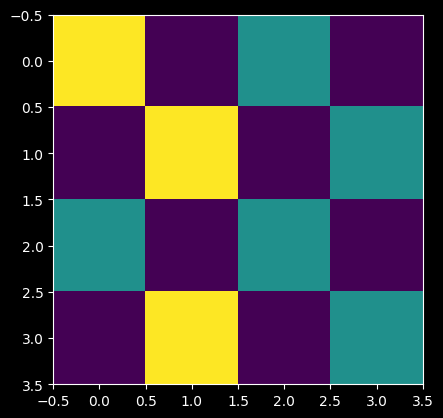

In [96]:
plt.imshow(conv(test_image.unsqueeze(0)).detach()[0].relu())

In [97]:
max_pooling(conv(test_image.unsqueeze(0)))

tensor([[[2., 1.],
         [2., 1.]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

In [98]:
max_pooling(feature_map.unsqueeze(0))

tensor([[[5., 2.],
         [2., 1.]]])

In [118]:
c = nn.Conv2d(1, 1, 3, padding=5)

c.kernel_size

(3, 3)